C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: overflow encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in double_scalars


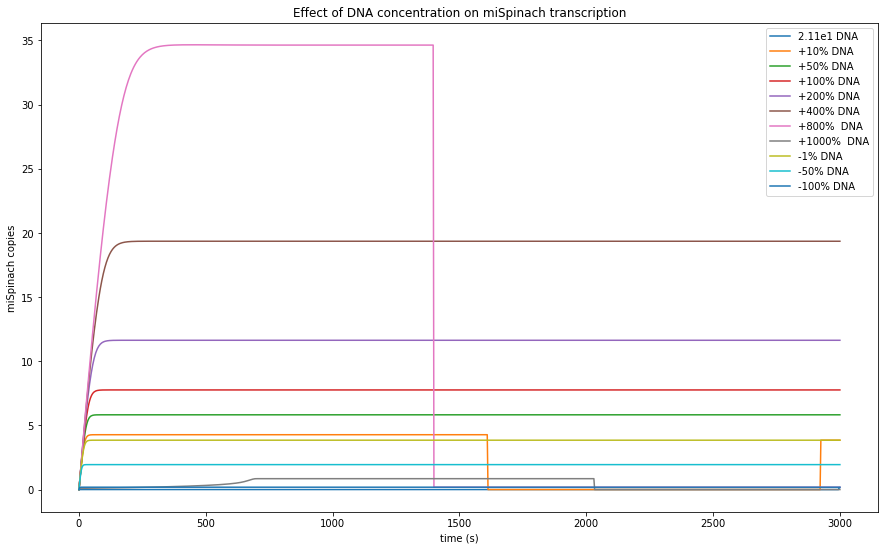

In [256]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


params= np.array([3.33e7, 3.51e1, 1.68e1, 1.59e8 , 1.66e7, 1.66e7, 1.26e4, 1.26e4, 3.41e2, 3.41e2, 
                  10e6, 2.9, 0.20673076923, 3.07e-3, 6.68e-10])

def Model(initials, t, params):
    #Parameters#
    KA2     = params[0] ;
    KB1     = params[1] ;
    KB2     = params[2];
    KH      = params[3] ; 
    KC1     = params[4] ;
    KC2     = params[5];
    KD1     = params[6];
    KD2     = params[7] ;
    KE1     = params[8];
    KE2     = params[9];
    kf=  params[10]; # forward rate constant (M^-1 s^-1)
    kb10=kb11=kb12=kb13= params[11]
    Tr=params[12]
    kd1= params[13]
    kdeg=params[14]
#Initial conditions#  
    ArsR=initials[0] #ArsR transcription factor monomers
    U= initials[1] #unspecific binding
    As= initials[2] # Arsenic atoms
    ABS= initials[3] # DNA copies
    ArsR2= initials[4]
    T7RNAP= initials[5]# T7 RNA polymerase copies
    ArsR2_As= initials[6]
    ArsR2_As2= initials[7]
    ArsR_U=initials[8]
    ArsR2_U= initials[9]
    ArsR2_As_U= initials[10]
    ArsR2_As2_U=initials[11]
    ArsR2_ABS= initials[12]
    ArsR2_As_ABS= initials[13]
    ArsR2_As2_ABS= initials[14]
    ABS_T7RNAP=initials[15]
    ArsR2_ABS_T7RNAP=initials[16]
    ArsR2_As_ABS_T7RNAP=initials[17]
    ArsR2_As2_ABS_T7RNAP= initials[18]
    miSpinach = initials[19]
    dydt=np.empty(20)
#Equations from the stoichometry matrix#    
    v1=kf*(ArsR)* (ArsR)
    v2=kf*(ArsR2)/KH
    v3=kf*(ArsR)*(U)
    v4=kf*(ArsR_U)/KB1
    v5=kf*(ArsR2)*(U)
    v6=kf*(ArsR2_U)/KB2
    v7=kf*(ArsR2)*(As)
    v8=kf*(ArsR2_As)/KC1
    v9=kf*(ArsR2_As)*(As)
    v10=kf*(ArsR2_As2)/KC2
    v11=kf*(ArsR2_As)*(U)
    v12=kf*(ArsR2_As_U)/KE1
    v13=kf*(ArsR2_As2)*(U)
    v14=kf*(ArsR2_As2_U)/KE2
    v15=kf*(ABS)*(ArsR2)
    v16=kf*(ArsR2_ABS)/KA2
    v17=kf*(ABS)*(ArsR2_As)
    v18=kf*(ArsR2_As_ABS)/KD1
    v19=kf*(ABS)*(ArsR2_As2)
    v20=kf*(ArsR2_As2_ABS)/KD2
    v21=kf*(ABS)*(T7RNAP)
    v22=kb10*(ABS_T7RNAP)
    v23=kf*(ArsR2_ABS)*(T7RNAP)
    v24=kb11*(ArsR2_ABS_T7RNAP)
    v25=kf*(ArsR2_As_ABS)*(T7RNAP)
    v26=kb12*(ArsR2_As_ABS_T7RNAP)
    v27=kf*(ArsR2_As2_ABS)*(T7RNAP)
    v28=kb13*(ArsR2_As2_ABS_T7RNAP)
    v29=kd1*(ArsR)
    v30=0.5*kd1*(ArsR2)
    v31=0.5*kd1*(ArsR2_As)
    v32=0.5*kd1*(ArsR2_As2)
    v33=kdeg*(miSpinach)
    v34= ((Tr* initials[3]*(ArsR2_As2_ABS_T7RNAP)+(ArsR2_As_ABS_T7RNAP)+(ABS_T7RNAP))/(1+ (ArsR2_ABS_T7RNAP)+ (ArsR2_As2_ABS_T7RNAP) + (ArsR2_As_ABS_T7RNAP) + (ABS_T7RNAP)))
  
    dydt[0]= (-2*v1)+(2*v2) -v3+ v4 - v29
    dydt[1]= v4 -v3 -v5 + v6 -v11 + v12 -v13 + v14
    dydt[2]= v8- v7 -v9 +v10 + v31 + (2*v32)
    dydt[3]= v16- v15 -v17+ v18- v19 + v20- v21+ v22
    dydt[4]= v1- v2- v5 + v6 - v7 + v8- v15+ v16 -v30
    dydt[5]= v22-v21-v23+v24-v25+v26-v27+v28
    dydt[6]=v7+ -v8 -v9 +v10 -v11 +v12- v17+ v18 - v31
    dydt[7]=v9- v10- v13+ v14- v19+ v20-v32
    dydt[8]=v3- v4
    dydt[9]=v5- v6
    dydt[10]=v11 -v12
    dydt[11]=v13 -v14
    dydt[12]=v15 -v16- v23 + v24
    dydt[13]=v17 -v18 -v25+ v26
    dydt[14]=v19- v20 -v27 +v28
    dydt[15]=v21-v22-v34
    dydt[16]=v23-v24-v34
    dydt[17]=v25-v26-v34
    dydt[18]=v27-v28-v34
    dydt[19]=v34-v33
    return dydt
t=np.linspace(0,200,1000)   
plt.figure(figsize=(15,9))
#DNA concentration
initials1=np.array([2e4,  2.11 , 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y1= odeint(Model, initials1 , t , args=(params,), mxstep=50000)
plt.plot(t,y1[:,19], label='2.11e1 DNA')
plt.xlabel('time ''(s)'); plt.ylabel('miSpinach copies')
plt.legend()
initials3=np.array([2e4, 2.11 , 7e3, 2.11e1 + 2.11e1*10/100, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y3= odeint(Model, initials3 , t , args=(params,), mxstep=50000)
plt.plot(t,y3[:,19], label='+10% DNA')
plt.legend()

initials4=np.array([2e4, 2.11  , 7e3, 2.11e1 + 2.11e1*50/100, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y4= odeint(Model, initials4 , t , args=(params,), mxstep=50000)
plt.plot(t,y4[:,19], label='+50% DNA')
plt.legend()
initials5=np.array([2e4,  2.11  , 7e3, 2.11e1 + 2.11e1*100/100, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y5= odeint(Model, initials5 , t , args=(params,), mxstep=50000)
plt.plot(t,y5[:,19], label='+100% DNA')
plt.legend()
initials10=np.array([2e4, 2.11  , 7e3, 2.11e1+ 2.11e1*200/100 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y10= odeint(Model, initials10 , t , args=(params,), mxstep=50000)
plt.plot(t,y10[:,19], label='+200% DNA')
plt.legend()
initials6=np.array([2e4, 2.11  , 7e3, 2.11e1 + 2.11e1*400/100, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y6= odeint(Model, initials6 , t , args=(params,), mxstep=50000)
plt.plot(t,y6[:,19], label='+400% DNA')
plt.legend()
initials2=np.array([2e4, 2.11 , 7e3, 2.11e1 + 2.11e1*800/100, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y2= odeint(Model, initials2 , t , args=(params,), mxstep=50000)
plt.plot(t,y2[:,19], label='+800%  DNA')
plt.legend()
initials11=np.array([2e4, 2.11 , 7e3, 2.11e1 + 2.11e1*1000/100, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y11= odeint(Model, initials11 , t , args=(params,), mxstep=50000)
plt.plot(t,y11[:,19], label='+1000%  DNA')
plt.legend()
initials7=np.array([2e4, 2.11 , 7e3, 2.11e1 - 2.11e1*1/100, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y7= odeint(Model, initials7 , t , args=(params,), mxstep=50000)
plt.plot(t,y7[:,19], label='-1% DNA')
plt.legend()
initials8=np.array([2e4, 2.11  , 7e3, 2.11e1 - 2.11e1*50/100, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y8= odeint(Model, initials8 , t , args=(params,), mxstep=50000)
plt.plot(t,y8[:,19], label='-50% DNA')
plt.legend()
initials9=np.array([2e4, 0 , 7e3, 2.21e1 - 2.11e1*100/100, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y9= odeint(Model, initials9 , t , args=(params,), mxstep=50000)
plt.plot(t,y9[:,19], label='-100% DNA')
plt.legend()
plt.title("Effect of DNA concentration on miSpinach transcription")
plt.show()

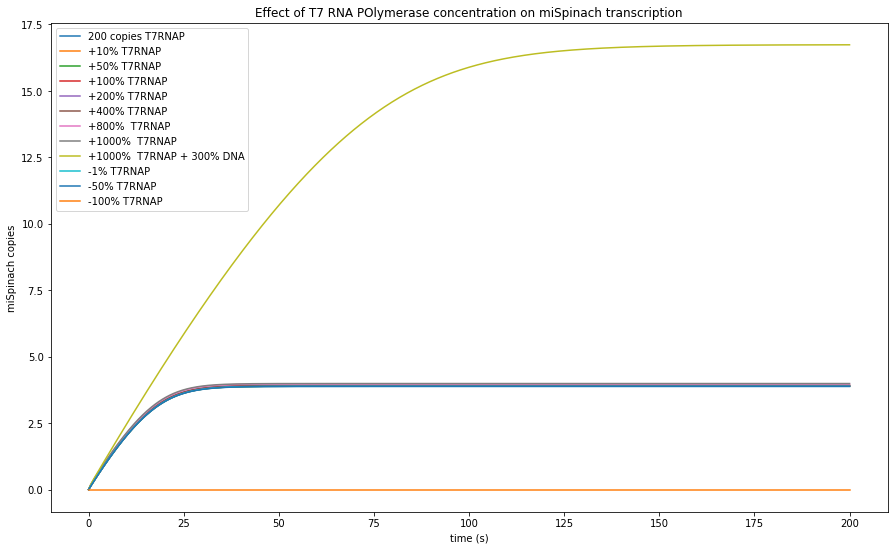

In [182]:
t=np.linspace(0,200,1000) 
plt.figure(figsize=(15,9))
#T7 RNA polymerase concentration
initials1=np.array([2e4, 1.11, 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y1= odeint(Model, initials1 , t , args=(params,), mxstep=50000)
plt.plot(t,y1[:,19], label='200 copies T7RNAP')
plt.xlabel('time ''(s)'); plt.ylabel('miSpinach copies')
plt.legend()
initials3=np.array([2e4, 1.11, 7e3, 2.11e1 , 0, 200 + 200*10/100, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y3= odeint(Model, initials3 , t , args=(params,), mxstep=50000)
plt.plot(t,y3[:,19], label='+10% T7RNAP')
plt.legend()

initials4=np.array([2e4, 1.11 , 7e3, 2.11e1 , 0, 200+ 200*50/100, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y4= odeint(Model, initials4 , t , args=(params,), mxstep=50000)
plt.plot(t,y4[:,19], label='+50% T7RNAP')
plt.legend()
initials5=np.array([2e4, 1.11 , 7e3 , 2.11e1 , 0, 200+ 200*100/100, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y5= odeint(Model, initials5 , t , args=(params,), mxstep=50000)
plt.plot(t,y5[:,19], label='+100% T7RNAP')
plt.legend()
initials10=np.array([2e4, 1.11 , 7e3 , 2.11e1, 0, 200+ 200*200/100, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y10= odeint(Model, initials10 , t , args=(params,), mxstep=50000)
plt.plot(t,y10[:,19], label='+200% T7RNAP')
plt.legend()
initials6=np.array([2e4, 1.11 , 7e3, 2.11e1 , 0, 200+ 200*400/100, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y6= odeint(Model, initials6 , t , args=(params,), mxstep=50000)
plt.plot(t,y6[:,19], label='+400% T7RNAP')
plt.legend()
initials2=np.array([2e4, 1.11 , 7e3 , 2.11e1, 0, 200+ 200*800/100, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y2= odeint(Model, initials2 , t , args=(params,), mxstep=50000)
plt.plot(t,y2[:,19], label='+800%  T7RNAP')
plt.legend()
initials11=np.array([2e4, 1.11 , 7e3, 2.11e1 , 0, 200+ 200*1000/100, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y11= odeint(Model, initials11 , t , args=(params,), mxstep=50000)
plt.plot(t,y11[:,19], label='+1000%  T7RNAP')
plt.legend()
initials11=np.array([2e4, 1.11 , 7e3, 8.88e1 , 0, 200+ 200*1000/100, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y11= odeint(Model, initials11 , t , args=(params,), mxstep=50000)
plt.plot(t,y11[:,19], label='+1000%  T7RNAP + 300% DNA')
plt.legend()
initials7=np.array([2e4, 1.11 , 7e3, 2.11e1 , 0, 200- 200*1/100, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y7= odeint(Model, initials7 , t , args=(params,), mxstep=50000)
plt.plot(t,y7[:,19], label='-1% T7RNAP')
plt.legend()
initials8=np.array([2e4, 1.11 , 7e3, 2.11e1 , 0, 200- 200*50/100, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y8= odeint(Model, initials8 , t , args=(params,), mxstep=50000)
plt.plot(t,y8[:,19], label='-50% T7RNAP')
plt.legend()
initials9=np.array([2e4, 1.11 , 7e3, 2.11e1, 0, 200- 200*100/100, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y9= odeint(Model, initials9 , t , args=(params,), mxstep=50000)
plt.plot(t,y9[:,19], label='-100% T7RNAP')
plt.legend()
plt.title("Effect of T7 RNA POlymerase concentration on miSpinach transcription")
plt.show()

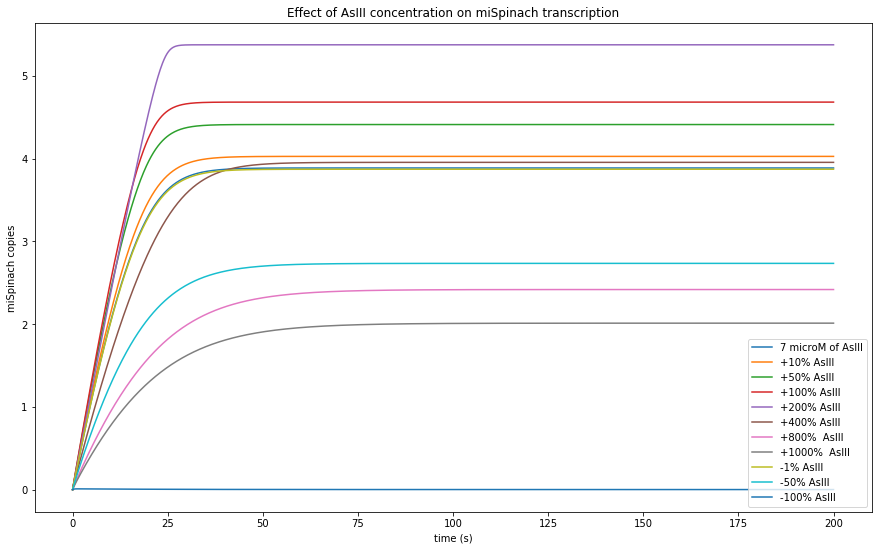

In [183]:
t=np.linspace(0,200,1000) 
plt.figure(figsize=(15,9))
#As concentration
initials1=np.array([2e4, 1.11, 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y1= odeint(Model, initials1 , t , args=(params,), mxstep=50000)
plt.plot(t,y1[:,19], label='7 microM of AsIII')
plt.xlabel('time ''(s)'); plt.ylabel('miSpinach copies')
plt.legend()
initials3=np.array([2e4, 1.11, 7e3 + 7e3*10/100, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y3= odeint(Model, initials3 , t , args=(params,), mxstep=50000)
plt.plot(t,y3[:,19], label='+10% AsIII')
plt.legend()

initials4=np.array([2e4, 1.11 , 7e3+ 7e3*50/100, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y4= odeint(Model, initials4 , t , args=(params,), mxstep=50000)
plt.plot(t,y4[:,19], label='+50% AsIII')
plt.legend()
initials5=np.array([2e4, 1.11 , 7e3 + 7e3*100/100, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y5= odeint(Model, initials5 , t , args=(params,), mxstep=50000)
plt.plot(t,y5[:,19], label='+100% AsIII')
plt.legend()
initials10=np.array([2e4, 1.11 , 7e3 + 7e3*200/100, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y10= odeint(Model, initials10 , t , args=(params,), mxstep=50000)
plt.plot(t,y10[:,19], label='+200% AsIII')
plt.legend()
initials6=np.array([2e4, 1.11 , 7e3 + 7e3*400/100, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y6= odeint(Model, initials6 , t , args=(params,), mxstep=50000)
plt.plot(t,y6[:,19], label='+400% AsIII')
plt.legend()
initials2=np.array([2e4, 1.11 , 7e3 + 7e3*800/100, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y2= odeint(Model, initials2 , t , args=(params,), mxstep=50000)
plt.plot(t,y2[:,19], label='+800%  AsIII')
plt.legend()
initials11=np.array([2e4, 1.11 , 7e3 + 7e3*1000/100, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y11= odeint(Model, initials11 , t , args=(params,), mxstep=50000)
plt.plot(t,y11[:,19], label='+1000%  AsIII')
plt.legend()
initials7=np.array([2e4, 1.11 , 7e3 -7e3*1/100, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y7= odeint(Model, initials7 , t , args=(params,), mxstep=50000)
plt.plot(t,y7[:,19], label='-1% AsIII')
plt.legend()
initials8=np.array([2e4, 1.11 , 7e3 - 7e3*50/100, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y8= odeint(Model, initials8 , t , args=(params,), mxstep=50000)
plt.plot(t,y8[:,19], label='-50% AsIII')
plt.legend()
initials9=np.array([2e4, 1.11 , 7e3 - 7e3*100/100, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y9= odeint(Model, initials9 , t , args=(params,), mxstep=50000)
plt.plot(t,y9[:,19], label='-100% AsIII')
plt.legend()
plt.title("Effect of AsIII concentration on miSpinach transcription")
plt.show()

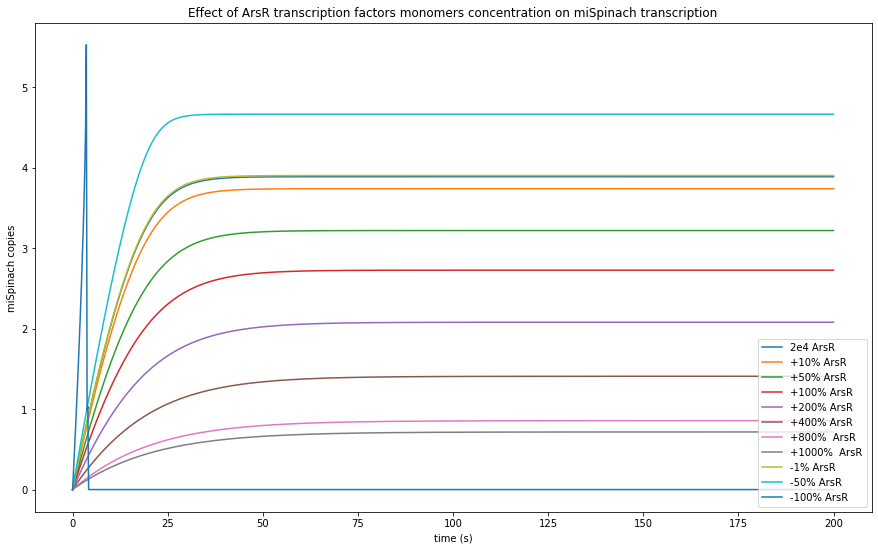

In [186]:
t=np.linspace(0,200,1000) 
plt.figure(figsize=(15,9))
#ArsR transcription factor monomers concentration#
initials1=np.array([2e4, 1.11, 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y1= odeint(Model, initials1 , t , args=(params,), mxstep=50000)
plt.plot(t,y1[:,19], label='2e4 ArsR')
plt.xlabel('time ''(s)'); plt.ylabel('miSpinach copies')
plt.legend()
initials3=np.array([2e4 + 2e4*10/100, 1.11, 7e3 , 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y3= odeint(Model, initials3 , t , args=(params,), mxstep=50000)
plt.plot(t,y3[:,19], label='+10% ArsR')
plt.legend()

initials4=np.array([2e4 + 2e4*50/100, 1.11 , 7e3, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y4= odeint(Model, initials4 , t , args=(params,), mxstep=50000)
plt.plot(t,y4[:,19], label='+50% ArsR')
plt.legend()
initials5=np.array([2e4 + 2e4*100/100, 1.11 , 7e3, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y5= odeint(Model, initials5 , t , args=(params,), mxstep=50000)
plt.plot(t,y5[:,19], label='+100% ArsR')
plt.legend()
initials10=np.array([2e4 + 2e4*200/100, 1.11 , 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y10= odeint(Model, initials10 , t , args=(params,), mxstep=50000)
plt.plot(t,y10[:,19], label='+200% ArsR')
plt.legend()
initials6=np.array([2e4 + 2e4*400/100, 1.11 , 7e3, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y6= odeint(Model, initials6 , t , args=(params,), mxstep=50000)
plt.plot(t,y6[:,19], label='+400% ArsR')
plt.legend()
initials2=np.array([2e4 + 2e4*800/100, 1.11 , 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y2= odeint(Model, initials2 , t , args=(params,), mxstep=50000)
plt.plot(t,y2[:,19], label='+800%  ArsR')
plt.legend()
initials11=np.array([2e4 + 2e4*1000/100, 1.11 , 7e3, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y11= odeint(Model, initials11 , t , args=(params,), mxstep=50000)
plt.plot(t,y11[:,19], label='+1000%  ArsR')
plt.legend()
initials7=np.array([2e4 -2e4*1/100, 1.11 , 7e3 , 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y7= odeint(Model, initials7 , t , args=(params,), mxstep=50000)
plt.plot(t,y7[:,19], label='-1% ArsR')
plt.legend()
initials8=np.array([2e4 -2e4*50/100, 1.11 , 7e3, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y8= odeint(Model, initials8 , t , args=(params,), mxstep=50000)
plt.plot(t,y8[:,19], label='-50% ArsR')
plt.legend()
initials9=np.array([2e4 -2e4*100/100, 1.11 , 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y9= odeint(Model, initials9 , t , args=(params,), mxstep=50000)
plt.plot(t,y9[:,19], label='-100% ArsR')
plt.legend(loc='lower right')
plt.title("Effect of ArsR transcription factors monomers concentration on miSpinach transcription")
plt.show()

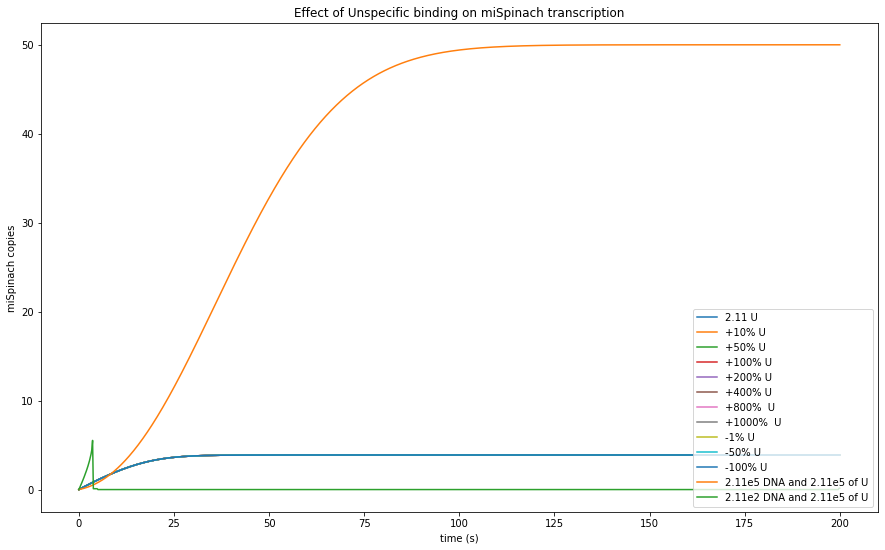

In [251]:
t=np.linspace(0,200,1000) 
plt.figure(figsize=(15,9))
#ArsR transcription factor monomers concentration#
initials1=np.array([2e4, 2.11, 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y1= odeint(Model, initials1 , t , args=(params,), mxstep=50000)
plt.plot(t,y1[:,19], label='2.11 U')
plt.xlabel('time ''(s)'); plt.ylabel('miSpinach copies')
plt.legend()
initials3=np.array([2e4, 2.11 + 2.11*10/100, 7e3 , 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y3= odeint(Model, initials3 , t , args=(params,), mxstep=50000)
plt.plot(t,y3[:,19], label='+10% U')
plt.legend()

initials4=np.array([2e4, 2.11 + 2.11*50/100, 7e3, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y4= odeint(Model, initials4 , t , args=(params,), mxstep=50000)
plt.plot(t,y4[:,19], label='+50% U')
plt.legend()
initials5=np.array([2e4 , 2.11 + 2.11*100/100, 7e3, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y5= odeint(Model, initials5 , t , args=(params,), mxstep=50000)
plt.plot(t,y5[:,19], label='+100% U')
plt.legend()
initials10=np.array([2e4 , 2.11 + 2.11*200/100, 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y10= odeint(Model, initials10 , t , args=(params,), mxstep=50000)
plt.plot(t,y10[:,19], label='+200% U')
plt.legend()
initials6=np.array([2e4 , 2.11 + 2.11*400/100, 7e3, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y6= odeint(Model, initials6 , t , args=(params,), mxstep=50000)
plt.plot(t,y6[:,19], label='+400% U')
plt.legend()
initials2=np.array([2e4 , 2.11 + 2.11*800/100, 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y2= odeint(Model, initials2 , t , args=(params,), mxstep=50000)
plt.plot(t,y2[:,19], label='+800%  U')
plt.legend()
initials11=np.array([2e4 , 2.11 + 2.11*1000/100 , 7e3, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y11= odeint(Model, initials11 , t , args=(params,), mxstep=50000)
plt.plot(t,y11[:,19], label='+1000%  U')
plt.legend()
initials7=np.array([2e4 , 2.11 -2.11*1/100, 7e3 , 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y7= odeint(Model, initials7 , t , args=(params,), mxstep=50000)
plt.plot(t,y7[:,19], label='-1% U')
plt.legend()
initials8=np.array([2e4, 2.11 -2.11*50/100, 7e3, 2.11e1 , 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y8= odeint(Model, initials8 , t , args=(params,), mxstep=50000)
plt.plot(t,y8[:,19], label='-50% U')
plt.legend()
initials9=np.array([2e4 , 2.11 -2.11*100/100 , 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y9= odeint(Model, initials9 , t , args=(params,), mxstep=50000)
plt.plot(t,y9[:,19], label='-100% U')
initials13=np.array([2e4 , 2.11e5  , 7e3, 2.11e5, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y13= odeint(Model, initials13 , t , args=(params,), mxstep=50000)
plt.plot(t,y13[:,19], label='2.11e5 DNA and 2.11e5 of U')
initials14=np.array([2e4 , 10e7  , 7e3, 2.11e1, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
y14= odeint(Model, initials14 , t , args=(params,), mxstep=50000)
plt.plot(t,y14[:,19], label='2.11e2 DNA and 2.11e5 of U')
plt.legend(loc='lower right')
plt.title("Effect of Unspecific binding on miSpinach transcription")
plt.show()

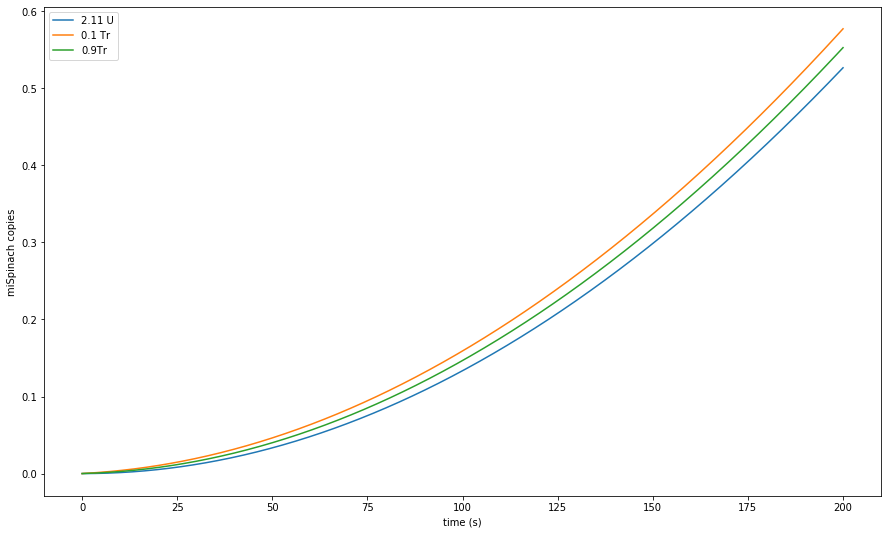

In [233]:
t=np.linspace(0,200,1000) 
plt.figure(figsize=(15,9))
#ArsR transcription factor monomers concentration#
initials1=np.array([2e4, 2.11, 7e3, 2.11e7, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
params= np.array([3.33e7, 3.51e1, 1.68e1, 1.59e8,1.66e7, 1.66e7, 1.26e4, 1.26e4, 3.41e2, 3.41e2, 
                  10e6, 2.9, 1700.20673076923, 3.07e-3, 6.68e-10])
y1= odeint(Model, initials1 , t , args=(params,), mxstep=50000)
plt.plot(t,y1[:,19], label='2.11 U')
plt.xlabel('time ''(s)'); plt.ylabel('miSpinach copies')
plt.legend()
initials2=np.array([2e4, 2.11, 7e3, 2.11e7, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
params1= np.array([3.33e7, 3.51e1, 1.68e1, 1.59e8,1.66e7, 1.66e7, 1.26e4, 1.26e4, 3.41e2, 3.41e2, 
                  10e6, 2.9, 0.10673076923, 3.07e-3, 6.68e-10])
y2= odeint(Model, initials2 , t , args=(params1,), mxstep=50000)
plt.plot(t,y2[:,19], label='0.1 Tr')
plt.xlabel('time ''(s)'); plt.ylabel('miSpinach copies')
plt.legend()
initials3=np.array([2e4, 2.11, 7e3, 2.11e7, 0, 200, 0, 0,
                   0, 0, 0, 0, 0, 0, 0,0,0,0,0,0])
params2= np.array([3.33e7, 3.51e1, 1.68e1, 1.59e8,1.66e7, 1.66e7, 1.26e4, 1.26e4, 3.41e2, 3.41e2, 
                  10e6, 2.9, 0.20673076923, 3.07e-3, 6.68e-10])
y3= odeint(Model, initials3 , t , args=(params2,), mxstep=50000)
plt.plot(t,y3[:,19], label='0.9Tr')
plt.xlabel('time ''(s)'); plt.ylabel('miSpinach copies')
plt.legend()

plt.show()